This is where I write code for the final function that will create visualizations. See "Experimental-Visualizations" for the work I did prior to this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('./data/df_v2.pkl')

print(df.shape)
df.head()

(215383, 17)


,id,songid,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,5PS5dpaLogPzYU9hWiWyZb,Karkkiautomaatti,Tanssi vaan,0.487,0.678,9.0,-7.780,1.0,0.0495,0.001300,0.0551,0.0846,0.870,149.940,157307.0,4.0
1,1,41RpZW2lxAdnqDd2nMBzLQ,Hudson Mohawke,No One Could Ever,0.662,0.823,4.0,-1.711,0.0,0.0662,0.000045,0.9520,0.3430,0.621,177.745,138960.0,4.0
2,2,2poHURuOfVNbzZdivAwtOH,Der Mystic,Tangle Of Aspens,0.430,0.960,5.0,-7.741,0.0,0.0431,0.000725,0.9250,0.1230,0.225,140.001,514290.0,4.0
3,3,1jg9hZnReygpBvV2axGuPy,Sasha / Turbulence,We Have Got Love,0.663,0.677,3.0,-4.117,0.0,0.0755,0.245000,0.0000,0.3500,0.879,152.085,212413.0,4.0
4,4,3GsS8jzoixpCnp4jDWCEvb,Kris Kross,2 Da Beat Ch'yall,0.859,0.741,11.0,-12.329,0.0,0.2710,0.002760,0.0000,0.3250,0.529,98.082,221200.0,4.0


In [3]:
# Using the min-max scalar to get everything within the 0-1 interval for plotting purposes.

from sklearn.preprocessing import MinMaxScaler

X = df.drop(['id', 'songid', 'artist', 'track', 'key', 'mode', 'duration_ms', 'time_signature'], axis=1)
print(X.shape)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
len(X_scaled)

(215383, 9)


215383

In [4]:
# create a pickle file with the above scaled data

import pickle

pickle.dump(X_scaled, open('X_visual.pkl', 'wb'))

In [5]:
# make sure the pickle file works
X_visual = pickle.load(open('X_visual.pkl', 'rb'))
len(X_visual)

215383

In [6]:
labels = [name.capitalize() for name in X.columns]
labels

['Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo']

In [7]:
# test this code I found online to make sure it works
from io import BytesIO
imgdata = BytesIO()

In [8]:
# First, I'll make sure the visualization itself comes out correctly.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

def make_visualization(id):

    df = pd.read_pickle('./data/df_v2.pkl')
    X = df.drop(['id', 'songid', 'artist', 'track', 'key', 'mode', 'duration_ms', 'time_signature'], axis=1)
    labels = [name.capitalize() for name in X.columns]
    X_visual = pickle.load(open('./data/X_visual.pkl', 'rb'))
    
    key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                    4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                    9: 'A', 10: 'B-flat', 11: 'B'}
    mode_notation = {0: 'Minor', 1: 'Major'}

    fig = plt.figure(facecolor='#171330', figsize=(5,5))
    ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True, facecolor='#EF019F')

    data = X_visual[id]

    theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / 9)
    radii = data
    p = []
    for i in range(9):
        p.append((theta[i], radii[i]))
    poly = plt.Polygon(p, ec="k", color='#780150')
    ax.add_patch(poly)

    ax.set_xticks(theta)
    ax.set_xticklabels(labels, rotation=45, color='white', fontweight='bold')
    ax.set_yticklabels([])
    ax.grid(b=False, axis='y')
    ax.grid(axis='x', color='#171330')

    key = key_notation[df.loc[id, 'key']]
    mode = mode_notation[df.loc[id, 'mode']]
    time_sig = int(df.loc[id, 'time_signature'])
    minutes = np.round(df.loc[id, 'duration_ms'] / 36000, 2)
    duration = str(minutes)[:-3] + ':' + str(minutes)[-2:]
    textstr = f"Pitch: {key} {mode};  Time Signature: {time_sig} / 4;  Duration: {duration} minutes"
    props = dict(boxstyle='round', facecolor='#780150', alpha=1)

    ax.text(40.05, 1.75, textstr, fontsize=14,
            verticalalignment='top', bbox=props, color='white')

    plt.show()

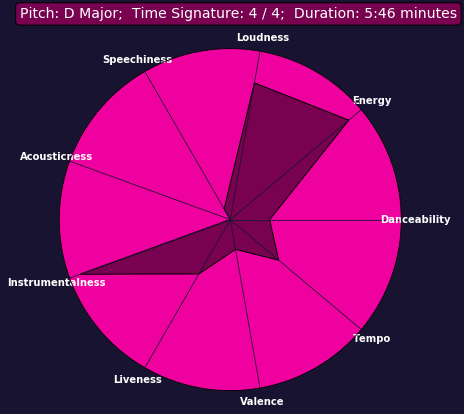

In [9]:
make_visualization(10)
# Success!

In [33]:
# Finally, let's write a function that outputs the image as a base64-encoded string.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

def base64_visualization(id):

    df = pd.read_pickle('./data/df_v2.pkl')
    X = df.drop(['id', 'songid', 'artist', 'track', 'key', 'mode', 'duration_ms', 'time_signature'], axis=1)
    labels = [name.capitalize() for name in X.columns]
    X_visual = pickle.load(open('./data/X_visual.pkl', 'rb'))
    
    key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                    4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                    9: 'A', 10: 'B-flat', 11: 'B'}
    mode_notation = {0: 'Minor', 1: 'Major'}

    fig = plt.figure(facecolor='#171330', figsize=(5,5))
    ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True, facecolor='#EF019F')

    data = X_visual[id]

    theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / 9)
    radii = data
    p = []
    for i in range(9):
        p.append((theta[i], radii[i]))
    poly = plt.Polygon(p, ec="k", color='#780150')
    ax.add_patch(poly)

    ax.set_xticks(theta)
    ax.set_xticklabels(labels, rotation=45, color='white', fontweight='bold')
    ax.set_yticklabels([])
    ax.grid(b=False, axis='y')
    ax.grid(axis='x', color='#171330')

    key = key_notation[df.loc[id, 'key']]
    mode = mode_notation[df.loc[id, 'mode']]
    time_sig = int(df.loc[id, 'time_signature'])
    minutes = np.round(df.loc[id, 'duration_ms'] / 36000, 2)
    duration = str(minutes)[:-3] + ':' + str(minutes)[-2:]
    textstr = f"Pitch: {key} {mode};  Time Signature: {time_sig} / 4;  Duration: {duration} minutes"
    props = dict(boxstyle='round', facecolor='#780150', alpha=1)

    ax.text(40.05, 1.75, textstr, fontsize=14,
            verticalalignment='top', bbox=props, color='white')

    buf = io.BytesIO()
    fig.savefig(buf, facecolor=fig.get_facecolor(), bbox_inches='tight', format='png')
    buf.seek(0)
    return base64.b64encode(buf.read())

b'iVBORw0KGgoAAAANSUhEUgAAAdAAAAGeCAYAAAAkD1AcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzddXxV9f/A8de5tQ4GCxgMGNLd3amIiCAoBqmIEioIBuUXUVF+IiIIKhKiAiqd0t3djN6Addet8/n9Mbkw2WBjY3fxeT4ePHT31Pvee+55n08exbd4HYEkSZIkSdmisXcAkiRJklQQ6XK6AyEERlMcVmM8qtWIQBZoJUmSpMJBUTQoOkcMDp4Y9K7pluUogQohSEq4iZNZpSnl8cEDLUqOgpUkSZKk/EAAFqzctEZy2HgVq3MJnJy8bctzlEBTjdG4muE1WqFTtDmNVZIkSZLyndIUp7oow7zk7egN7ui0DkAO20CtxngaU0EmT0mSJKlQ81CcqUIpjMZY22s5SqAWqxE/PHMcmCRJkiTld/4UA6vJ9ncOe+EKtI+xC8+y3nyhrsC/foXHPnJu7CO/emPbZJ6b+Ya9w8hUfv/s20/sw8hTM+wdhlTIfaGuoEbPpvYOo8Aac3UuLUd1t3cY2aJFC+JeR1klJ+NAY6PPM1C0xkNxTvd6r1+GU79/OwCsZgtxwZGcWXGALROXYE42omg0uHi7kxwZj2pVKd+6Om9u/4zJ3q+THJWQpWN7lvVm7LUf+b7haG4dvfK4bwFI+yKLlfMBwJxqIikinltHLnNk/lYurD3y0G3bT+xDh4kvcXnLSeZ1mpRuWZOhXeg+awihZ24yo9bILMfjVMwVq9mCKTE12+8lJ+5+pg+z5dMlbJv8Z7rvLy8pGg0tR3enfr92eJb1xmo0E3UllOO/7mDfzHUAGFwc0TnoSY7O2rmUWx7nPM5rOgc9bx+YSsna5bP823n+h7cwpx

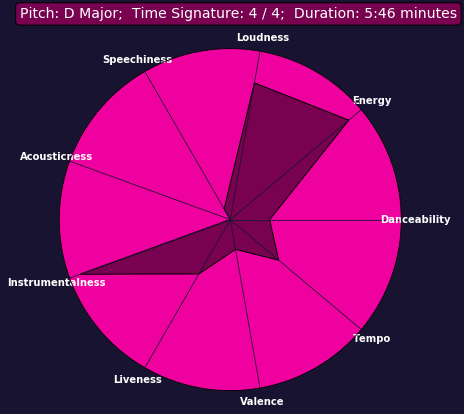

In [34]:
b = base64_visualization(10)
print(b)

In [12]:
type(b)

bytes

In [13]:
base64.decodebytes(b)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x008tEXtSoftware\x00matplotlib version3.1.1, http://matplotlib.org/\x10f\x17\x19\x00\x00 \x00IDATx\x9c\xec\x9dwxTU\xfe\xc6?wj&S\x92\x90@B\xefE\x14\xe9\xbdH\x15\xa5X@\x14\xc4\xde\xb0\xac\x8a\xdd\xd5uuw\xd5Uwm\xbb\xf6\x9fu\x95\xa2"\x8at\x0b\xbd)M\xa9)\x10:$\x90d\x92\xe9\xf5\x9e\xdf\x1f\x14E\x08i3sg\x92\xfby\x1e\x1e4\x99\xb9\xe7e2y\xe7\xdc\xef9\xe7\xfdJB\x08\x81\x8a\x8a\x8a\x8aJ\xdc\xa1QZ\x80\x8a\x8a\x8a\x8a\xca\xd9Q\rZEEE%NQ\rZEEE%NQ\rZEEE%NQ\rZEEE%NQ\rZEEE%NQ\rZEEE%N\xd1)-@E\xe5\\\x84\xc3a\\.\x17N\xa7\xf3\xac\x7f\x07\x02\x01dY>\xf5\x07@\xa3\xd1\x9c\xfac0\x18\xb0X,X\xad\xd6\xb3\xfe\xad\xd5j\x15\xfe\x17\xaa\xa8\x94\x8fj\xd0*\x8a\xe0p8\xd8\xb7o\x1f\x87\x0f\x1f\xe6\xc8\x91#\x1c\xde}\x80#\xf9\x079t\xe0 \x05\x05\x05\xf8<^\xe4\xa0\x8cV\x960k\x92\xb0HIXD\x12\x16\xd9\x889l\xc4\x124`\x